<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*
# Análise exploratória da Covid-19 no planeta
O último vírus que assombrou o planeta no último ano, causando uma pandemia, denominado Covid-19, teve ínicio na cidade de Wuhan, localizada na China.

A doença possui uma letalidade global de aproximadamente 3,4%, aumentando de acordo com a idade da pessoa acometida e com as comorbidades presentes.

A taxa transmissão do vírus é de aproximadamente 2,75, isso quer dizer que uma pessoa infectada transmite, em média, para outros 2,75 indivíduos.

Nos últimos meses foi iniciada a vacinação em todo mundo, com a esperança de que conseguiremos conter este vírus.

<center><img width="30%" src="https://img.freepik.com/free-vector/fight-virus-concept_23-2148530807.jpg"></center>

<center><a href='https://www.freepik.com/vectors/health'>Health vector created by freepik - www.freepik.com</a></center>

**Por estar em total evidência nos últimos meses desde janeiro de 2020, é que vamos fazer uma análise exploratória completa com os dados da Covid-19 ao longo deste notebook.**

Posteriormente, vamos fazer também uma análise exploratória focada apenas no Brasil.

---


## Obtenção dos dados

Os dados que serão explorados aqui, foram retirados da base de dados do [Our World In Data](https://ourworldindata.org/coronavirus). Eles possuem um DataSet bem completo, atualizado diariamente. Vale a pena também, explorar a página deles (link acima). Lá se encontra diversos dashboards muito interessantes para análise da situação do Covid-19 no mundo.


### Importando os dados e bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Análise exploratória inicial

Após importar o nosso DataFrame no item anterior, vamos fazer uma análise inicial do mesmo para nos situar e vizualizar o banco de dados em questão e assim conseguir informações básicas para darmos prosseguimento a análise de forma mais aprofundada.

Esta etapa inicial, é muito importante, pois, é nela que vamos entender como devemos trabalhar com esse banco de dados específico.

Vamos extrair informações como: tamanho do Data Frame, nomes das séries (colunas), quais são os tipos das varíaveis, vizualização das entradas (linhas), identificar valores ausentes, entre outros.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72096 entries, 0 to 72095
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               72096 non-null  object 
 1   continent                              68516 non-null  object 
 2   location                               72096 non-null  object 
 3   date                                   72096 non-null  object 
 4   total_cases                            71132 non-null  float64
 5   new_cases                              71130 non-null  float64
 6   new_cases_smoothed                     70129 non-null  float64
 7   total_deaths                           62042 non-null  float64
 8   new_deaths                             62200 non-null  float64
 9   new_deaths_smoothed                    70129 non-null  float64
 10  total_cases_per_million                70743 non-null  float64
 11  ne

Conforme mostrado acima, nosso DataFrame possui 71.494 entradas (linhas) e 59 variáveis (colunas). Temos também textos tipos números e strings. Podemos ter já nesse primeiro comando uma boa visão geral de como estão os dados do DF.

Vamos agora ver as 05 primeiras e as 05 últimas entradas do nosso DataFrame.

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72091,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,2421.730,2.288,4.335,98.096,0.135,0.365,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2965.0,376803.0,25.352,0.199,1903.0,0.128,0.034,29.5,tests performed,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72092,ZWE,Africa,Zimbabwe,2021-02-26,36044.0,50.0,47.714,1463.0,5.0,4.714,2425.094,3.364,3.210,98.433,0.336,0.317,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2141.0,378944.0,25.496,0.144,1868.0,0.126,0.026,39.1,tests performed,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72093,ZWE,Africa,Zimbabwe,2021-02-27,36058.0,14.0,41.429,1463.0,0.0,4.429,2426.036,0.942,2.787,98.433,0.000,0.298,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302.0,380246.0,25.584,0.088,1849.0,0.124,0.022,44.6,tests performed,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72094,ZWE,Africa,Zimbabwe,2021-02-28,36089.0,31.0,41.857,1463.0,0.0,3.857,2428.122,2.086,2.816,98.433,0.000,0.260,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,914.0,381160.0,25.645,0.061,1806.0,0.122,0.023,43.1,tests performed,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72095,ZWE,Africa,Zimbabwe,2021-03-01,36115.0,26.0,36.143,1468.0,5.0,3.857,2429.871,1.749,2.432,98.769,0.336,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21456.0,21456.0,NaN,2613.0,2877.0,0.14,0.14,NaN,194.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Com esses comandos executados acima, conseguimos ter uma vizualização melhor do nosso DataSet, em forma de linhas e colunas.

Um ponto muito importante desta forma de vizualizar o nosso DataSet é que além de enxergarmos os números no seu devido lugar, conseguimos identificar também as colunas que tem valores ausentes com mais facilidade.

Vamos agora verificar a porcentagem de valores ausentes nas colunas.

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of        iso_code  continent  ...  life_expectancy  human_development_index
0         False      False  ...            False                    False
1         False      False  ...            False                    False
2         False      False  ...            False                    False
3         False      False  ...            False                    False
4         False      False  ...            False                    False
...         ...        ...  ...              ...                      ...
72091     False      False  ...            False                    False
72092     False      False  ...            False                    False
72093     False      False  ...            False                    False
72094     False      False  ...            False                    False
72095     False      False  ...            False                    False

[72096 rows x 59 columns]>

In [ ]:
df.isnull().sum() / df.shape[0]

iso_code                                 0.000000
continent                                0.049656
location                                 0.000000
date                                     0.000000
total_cases                              0.013371
new_cases                                0.013399
new_cases_smoothed                       0.027283
total_deaths                             0.139453
new_deaths                               0.137261
new_deaths_smoothed                      0.027283
total_cases_per_million                  0.018767
new_cases_per_million                    0.018794
new_cases_smoothed_per_million           0.032609
total_deaths_per_million                 0.144668
new_deaths_per_million                   0.142477
new_deaths_smoothed_per_million          0.032609
reproduction_rate                        0.195448
icu_patients                             0.894405
icu_patients_per_million                 0.894405
hosp_patients                            0.872989


Nesta última análise conseguimos ver qual a porcentagem de valores nulos em cada coluna. Pode-se notar que algumas colunas praticamente nem foram alimentadas. 

Vamos transformar a coluna "date" para formato datetime, para que possamos explorar essa variável ao máximo.

In [ ]:
df.date = pd.to_datetime(df.date)
df.date.max()

Timestamp('2021-03-01 00:00:00')

Conforme podemos ver acima, a última data que foi alimentada nesse DataFrame é de 01/03/2021.

## Informações Estatísticas do Covid-19

Finalizado a etapa inicial da análise dos dados, vamos aprofundar um pouco mais em itens específicos. Como o nosso DataFrame é composto de muitas variáveis, vamos escolher algumas para analisar de forma mais aprofundada.

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.093300e+04,70931.000000,69930.000000,6.185400e+04,62012.000000,69930.000000,70545.000000,70543.000000,69547.000000,61479.000000,61637.000000,69547.000000,57824.000000,7613.000000,7613.000000,9157.000000,9157.000000,717.000000,717.000000,1182.000000,1182.000000,3.285100e+04,3.269400e+04,32694.000000,32851.000000,3.744900e+04,37449.000000,36226.000000,35675.000000,2.918000e+03,2.471000e+03,1.607000e+03,2.468000e+03,4.269000e+03,2918.000000,2471.000000,1607.000000,4269.000000,61467.000000,7.149800e+04,67196.000000,65407.000000,64653.000000,65038.00000,65584.000000,44799.000000,66193.000000,67018.000000,52096.000000,51381.000000,33212.000000,60651.000000,68316.000000,66171.000000
mean,6.068499e+05,5105.586316,5126.638594,1.831622e+04,131.216861,115.200623,7139.394665,64.820478,64.811251,170.642827,1.374562,1.204662,1.018003,1017.758177,22.286804,5117.363001,149.963495,278.841688,16.075855,2745.477240,99.907692,3.743382e+04,4.378326e+06,159.364932,1.464078,3.592438e+04,1.395930,0.087656,161.276205,4.062581e+06,3.083757e+06,1.246617e+06,1.813777e+05,1.130167e+05,6.356796,4.844213,2.394213,2255.758960,58.982399,1.316573e+08,327.227989,30.573483,8.810294,5.58487,19136.464863,13.252561,257.059990,7.792841,10.560287,32.650412,51.028831,3.037860,73.139962,0.728095
std,4.285003e+06,32188.728177,31956.693848,1.066911e+05,720.766814,657.731277,14155.550538,166.344126,139.609605,305.380365,3.866550,2.777568,0.351355,2801.536096,24.915698,13832.481846,187.934222,520.764483,30.364094,6050.731476,224.146485,1.459665e+05,2.032969e+07,326.914622,3.932963,1.341898e+05,3.029304,0.099707,859.427892,1.922750e+07,1.241023e+07,4.801952e+06,7.454597e+05,5.071585e+05,13.135107,9.052167,5.740756,4523.741795,22.140591,6.997727e+08,1592.003406,9.119377,6.246240,4.26659,19682.904401,19.911393,118.372675,3.929761,10.413011,13.462357,31.769188,2.468071,7.550833,0.150147
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.600000,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.52600,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.040000e+02,1.000000,5.714000,3.500000e+01,0.000000,0.000000,136.271000,0.125000,0.971000,5.420000,0.000000,0.000000,0.870000,20.000000,3.108000,81.000000,17.217000,5.968000,1.287000,36.605000,7.462250,1.316000e+03,1.012532e+05,8.286500,0.105000,1.370000e+03,0.106000,0.015000,8.000000,3.000000e+04,2.681350e+04,1.318550e+04,2.184000e+03,1.113000e+03,0.532500,0.490000,0.225000,267.000000,44.440000,2.722291e+06,36.253000,22.2000

In [ ]:
round((df.total_deaths.mean() / df.population.mean()) * 100 , 3)

0.014

In [ ]:
round((df.total_deaths.mean() / df.total_cases.mean()) * 100, 2)

3.02

Fizemos um resumo estatístico do nosso DataFrame e logo abaixo fizemos uma relação da média do número de mortes com a média populacional, ou seja, o Covid-19 matou em média aproximadamente 0,014% da população mundial.

Fizemos também, a relação do número total de mortes com o número total de casos, isso mostra que a letalidade do Covid-19 é em média de aproximadamente 3,02%.

Vamos agora, ver quais são os 05 locais mais afetados pelo Covid-19 e ver quais são os números de mortes deles.

In [ ]:
# Número total de casos
df.loc[df.date=="2021-03-01"].sort_values(by="total_cases" , ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71073,OWID_WRL,NaN,World,2021-03-01,114442646.0,306291.0,388679.571,2538808.0,7253.0,9229.429,14681.924,39.294,49.864,325.705,0.930,1.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249261783.0,150045928.0,53964427.0,4354035.0,5180360.0,3.20,1.92,0.69,665.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
22389,OWID_EUR,NaN,Europe,2021-03-01,34433651.0,101692.0,143962.429,817560.0,2750.0,3147.000,45992.477,135.828,192.288,1092.002,3.673,4.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47780,OWID_NAM,NaN,North America,2021-03-01,32952021.0,68618.0,81373.571,748936.0,2106.0,2969.857,55655.410,115.895,137.439,1264.940,3.557,5.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68732,USA,North America,United States,2021-03-01,28664481.0,58812.0,67760.286,514657.0,1566.0,2046.143,86598.948,177.678,204.712,1554.843,4.731,6.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76899987.0,50732997.0,25466405.0,1663984.0,1817502.0,22.99,15.17,7.61,5434.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
3770,OWID_ASI,NaN,Asia,2021-03-01,25091191.0,69008.0,72578.000,399483.0,742.0,950.000,5407.762,14.873,15.642,86.098,0.160,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41142,MHL,Oceania,Marshall Islands,2021-03-01,4.0,0.0,0.000,NaN,NaN,0.000,67.574,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.919400e+04,295.150,NaN,NaN,NaN,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704
55234,WSM,Oceania,Samoa,2021-03-01,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715
69550,VUT,Oceania,Vanuatu,2021-03-01,1.0,0.0,0.000,NaN,NaN,0.000,3.256,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.071500e+05,22.

In [ ]:
# Número total de mortes
df.loc[df.date=="2021-03-01"].sort_values(by="total_deaths" , ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71073,OWID_WRL,NaN,World,2021-03-01,114442646.0,306291.0,388679.571,2538808.0,7253.0,9229.429,14681.924,39.294,49.864,325.705,0.930,1.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249261783.0,150045928.0,53964427.0,4354035.0,5180360.0,3.20,1.92,0.69,665.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
22389,OWID_EUR,NaN,Europe,2021-03-01,34433651.0,101692.0,143962.429,817560.0,2750.0,3147.000,45992.477,135.828,192.288,1092.002,3.673,4.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47780,OWID_NAM,NaN,North America,2021-03-01,32952021.0,68618.0,81373.571,748936.0,2106.0,2969.857,55655.410,115.895,137.439,1264.940,3.557,5.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22793,OWID_EUN,NaN,European Union,2021-03-01,22550989.0,70140.0,108098.714,547909.0,2132.0,2189.429,50685.599,157.647,242.963,1231.480,4.792,4.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33822548.0,21769180.0,10965762.0,439408.0,843384.0,7.60,4.89,2.46,1896.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68732,USA,North America,United States,2021-03-01,28664481.0,58812.0,67760.286,514657.0,1566.0,2046.143,86598.948,177.678,204.712,1554.843,4.731,6.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76899987.0,50732997.0,25466405.0,1663984.0,1817502.0,22.99,15.17,7.61,5434.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55234,WSM,Oceania,Samoa,2021-03-01,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715
59025,SLB,Oceania,Solomon Islands,2021-03-01,18.0,0.0,0.000,NaN,NaN,0.000,26.206,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
65358,TLS,Asia,Timor,2021-03-01,113.0,0.0,1.429,NaN,NaN,0.000,85.707,0.000,1.084,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Podemos ver nesse resultado que os 03 primeiros locais mais afetados são:
* 1° - Europa: 34.433.651 de casos
* 2° - América do Norte: 32.952.021 de casos
* 3° - EUA: 28.664.481 de casos

E os 03 primeiros locais com mais mortes são:
* 1° - Europa: 817.560 de mortes
* 2° - América do Norte: 748.936 de mortes
* 3° - União Europeia: 547.909 de mortes


## Visualização de Dados

Vamos agora vizualizar nossos dados de maneira gráfica a fim de retirar insights valiosos. Vamos começar plotando um gráfico de barras para vermos melhor a situação dos locais mais afetados pelo Covid-19.

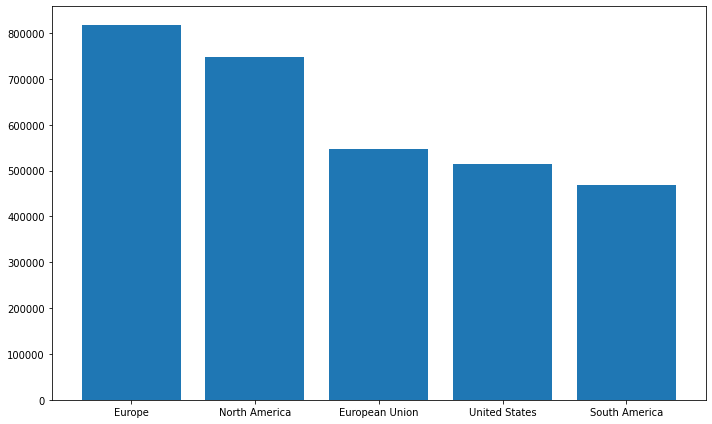

In [ ]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == '2021-03-01', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,6))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

Neste gráfico acima, conseguimos ver os 05 locais com mais mortes pela covid-19 no mundo.

Vamos plotar um gráfico também, para vizualizar como o número de mortes aumentou no mundo.

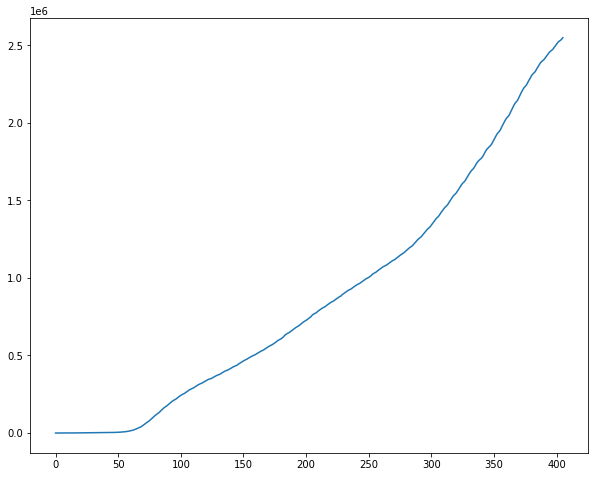

In [ ]:
# Gráfico de linhas para evolução das mortes da Covid-19 no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

## Análise exploratória para o Brasil
Vamos agora fazer uma rápida análise exploratória com dados exclusivos para o Brasil.

In [27]:
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9355,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9356,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9357,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9358,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9359,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [4]:
df_brasil.date.max()

'2021-03-04'

Acima verificamos que o nosso DataSet possui dados de 26/02/2020 até 04/03/2020

Vamos agora identificar quando houve o primeiro caso e a primeira morte no Brasil.

In [5]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9355,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [9]:
# identificaçãso do primeiro caso
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9355,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


O primeiro caso e a primeira morte foram ambos identificados em 26/02/2020.

Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

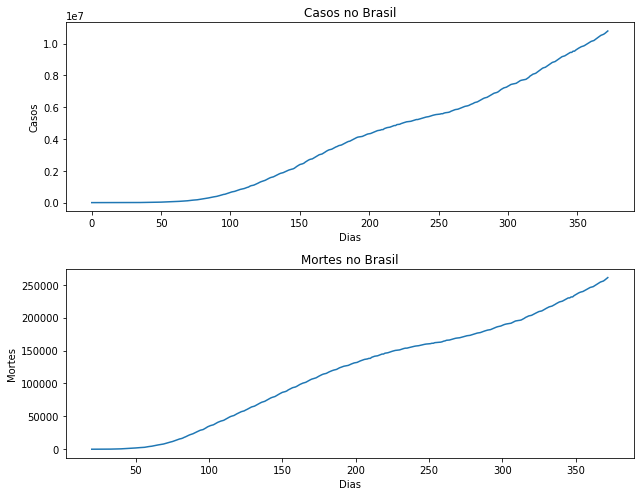

In [24]:
x = list(range(373))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Mortes no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
ax2.plot(x, z2)

plt.tight_layout()


## Conclusão

Como esses dados são atualizados diariamente, essa análise exploratória ficará desatualizada em alguns poucos dias.

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* A Europa está disparada em relação aos casos e mortes.
* A evolução dos casos no Brasil está em tendência de crescimento, como vimos nos gráficos de linhas.
* No geral, casos e mortes ainda estão crescendo.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.